In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Coursework1
!ls

Mounted at /content/drive
/content/drive/MyDrive/Coursework1
 2432227_Jashika_Phuyal_Coursework1.ipynb  'World Happiness Report.csv'


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Coursework1/World Happiness Report.csv'
data = pd.read_csv(file_path)


3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up

Exercises:

1. Data Exploration and Understanding:

• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [ ]:
print("First 10 Rows of the Dataset:")
print(data.head(10))

rows, columns = data.shape
print(f"\nNumber of Rows: {rows}")
print(f"Number of Columns: {columns}")

print("\nColumns and Their Data Types:")
print(data.dtypes)


First 10 Rows of the Dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Coursework1/World Happiness Report.csv'
data = pd.read_csv(file_path)

data['score'] = pd.to_numeric(data['score'], errors='coerce')

data['score'] = data['score'].fillna(data['score'].mean())

mean_score = data['score'].mean()
median_score = data['score'].median()
std_dev_score = data['score'].std()

print(f"Mean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Standard Deviation of Score: {std_dev_score}")

max_score_country = data.loc[data['score'].idxmax()]
min_score_country = data.loc[data['score'].idxmin()]

print(f"\nCountry with Highest Happiness Score: {max_score_country['Country name']}, Score: {max_score_country['score']}")
print(f"Country with Lowest Happiness Score: {min_score_country['Country name']}, Score: {min_score_country['score']}")


Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995

Country with Highest Happiness Score: Finland, Score: 7.741
Country with Lowest Happiness Score: Afghanistan, Score: 1.721


Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Coursework1/World Happiness Report.csv'
data = pd.read_csv(file_path)

missing_values = data.isnull().sum()


print("Missing Values Count for Each Column:")
print(missing_values[missing_values > 0])


Missing Values Count for Each Column:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Coursework1/World Happiness Report.csv'
data = pd.read_csv(file_path)

data['score'] = pd.to_numeric(data['score'], errors='coerce')
data['Log GDP per capita'] = pd.to_numeric(data['Log GDP per capita'], errors='coerce')

filtered_data = data[data['score'] > 7.5]
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)

print("Top 10 Countries with Score Greater than 7.5 Sorted by GDP per Capita:")
print(sorted_data.head(10))


Top 10 Countries with Score Greater than 7.5 Sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Coursework1/World Happiness Report.csv'
data = pd.read_csv(file_path)

data['score'] = pd.to_numeric(data['score'], errors='coerce')
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(categorize_happiness)


print(data[['Country name', 'score', 'Happiness Category']].head(10))


  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
• Plot a histogram for the Score column to show its distribution and also interpret.
• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

<ipython-input-12-704bdc07caab>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_happiest, palette='viridis')


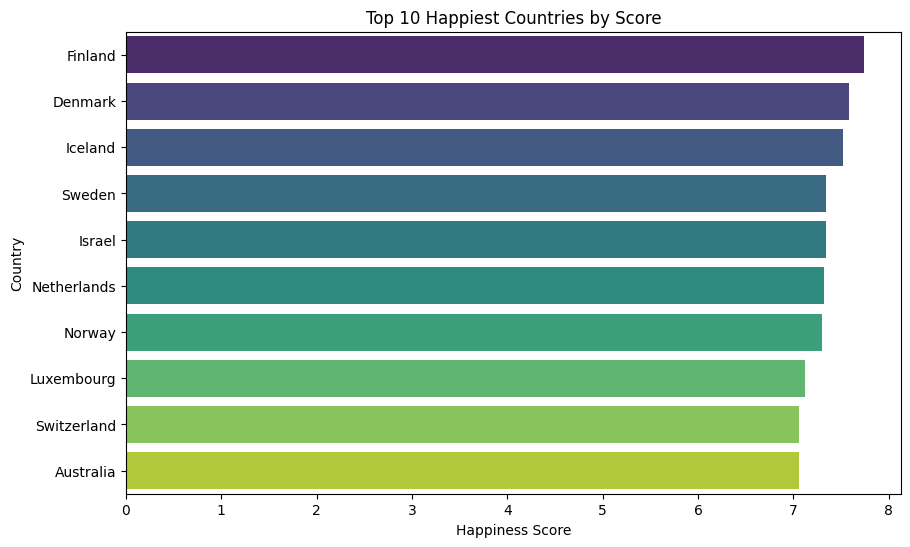

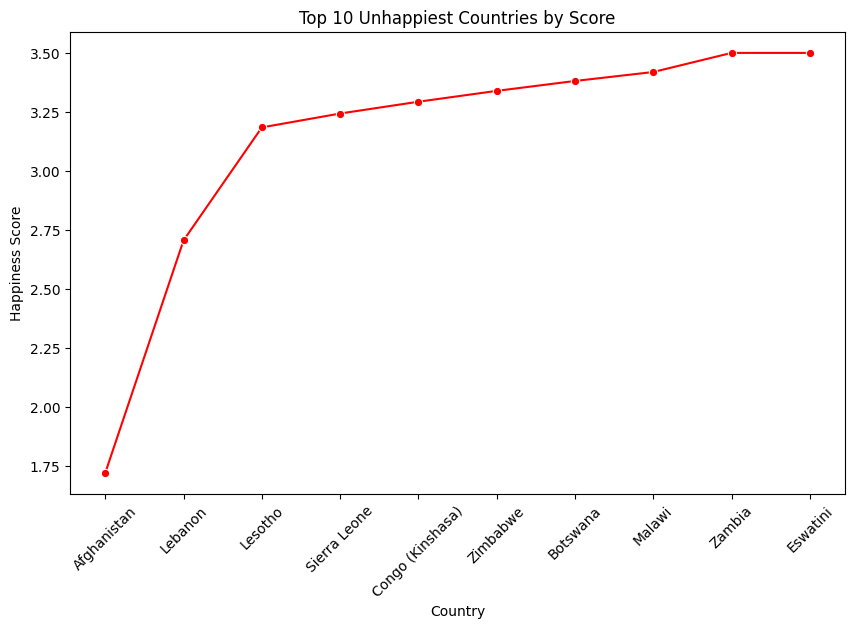

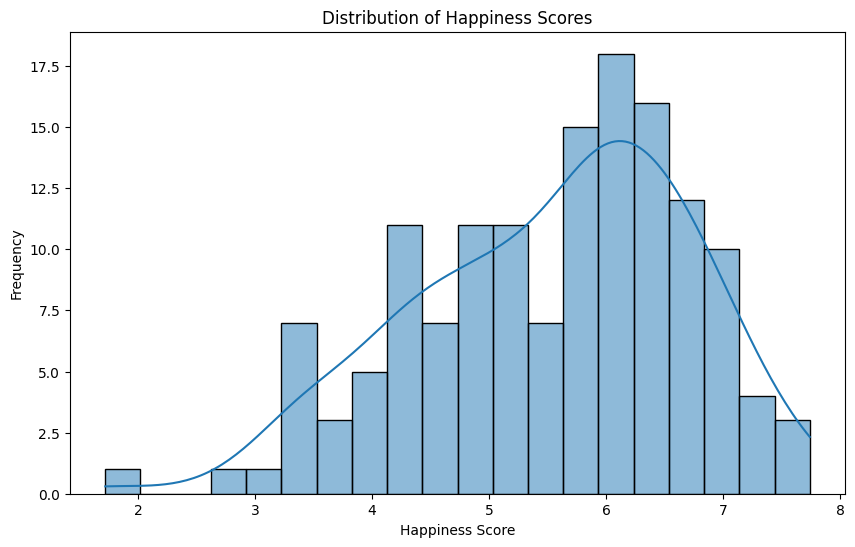

Interpretation of Histogram:
The histogram shows the distribution of happiness scores across countries. If the distribution is skewed to the right, it indicates that most countries have higher happiness scores, while a left skew suggests that many countries are struggling with lower happiness levels.


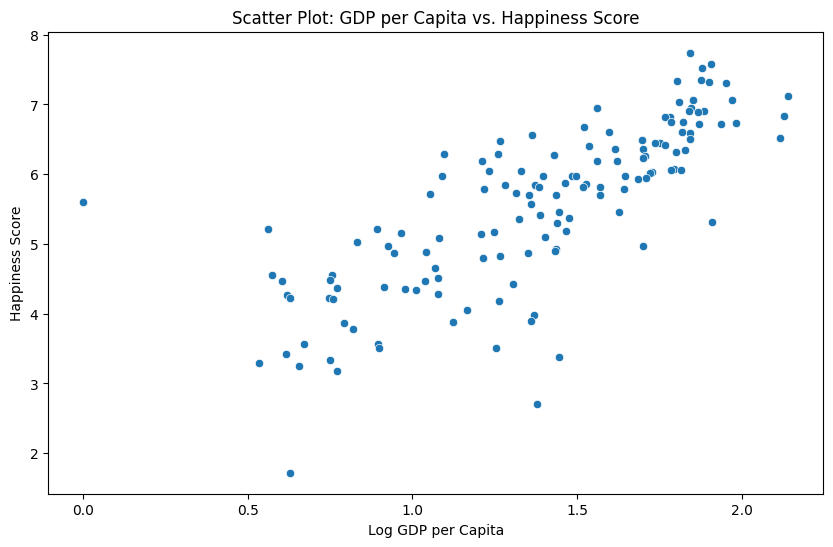

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/drive/MyDrive/Coursework1/World Happiness Report.csv'
data = pd.read_csv(file_path)

data['score'] = pd.to_numeric(data['score'], errors='coerce')
data['Log GDP per capita'] = pd.to_numeric(data['Log GDP per capita'], errors='coerce')

top_happiest = data.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

top_unhappiest = data.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=top_unhappiest, marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

print("Interpretation of Histogram:")
print("The histogram shows the distribution of happiness scores across countries. "
      "If the distribution is skewed to the right, it indicates that most countries have higher happiness scores, "
      "while a left skew suggests that many countries are struggling with lower happiness levels.")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data)
plt.title('Scatter Plot: GDP per Capita vs. Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


3.2 Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

<ipython-input-13-ae41c31a879d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Composite Score'] = (0.40 * filtered_df['Log GDP per capita'] +


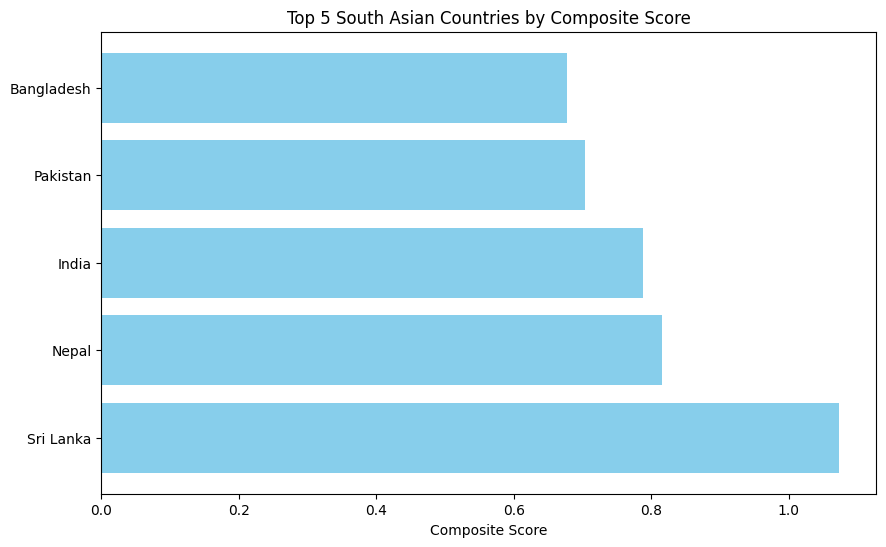

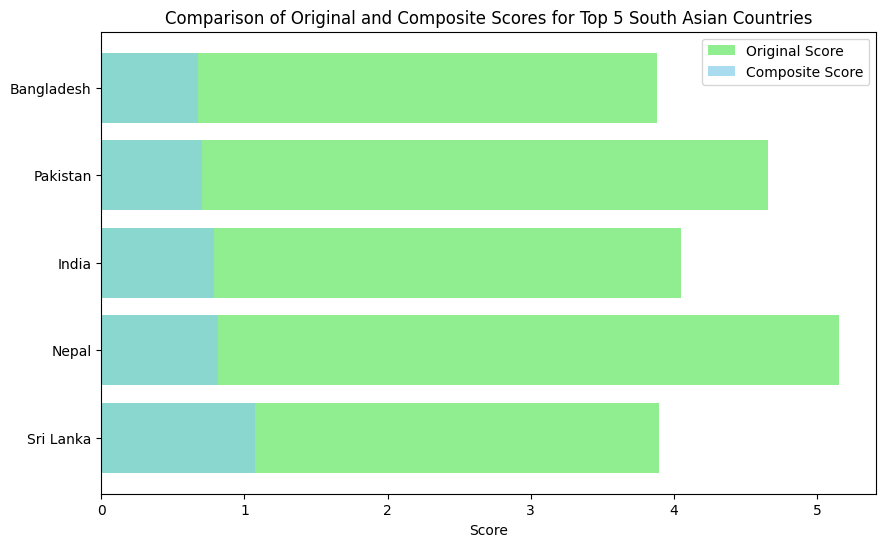


Ranked DataFrame:
    Country name  score  Composite Score
127    Sri Lanka  3.898           1.0739
92         Nepal  5.158           0.8159
125        India  4.054           0.7874
107     Pakistan  4.657           0.7039
128   Bangladesh  3.886           0.6774
142  Afghanistan  1.721           0.3238


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asia_df = pd.read_csv('World Happiness Report.csv')

filtered_df = south_asia_df[south_asia_df['Country name'].isin(south_asian_countries)]

filtered_df['Composite Score'] = (0.40 * filtered_df['Log GDP per capita'] +
                                   0.30 * filtered_df['Social support'] +
                                   0.30 * filtered_df['Healthy life expectancy'])

ranked_df = filtered_df.sort_values(by='Composite Score', ascending=False)

top_5 = ranked_df.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5['Country name'], top_5['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(top_5['Country name'], top_5['score'], color='lightgreen', label='Original Score')
plt.barh(top_5['Country name'], top_5['Composite Score'], color='skyblue', alpha=0.7, label='Composite Score')
plt.xlabel('Score')
plt.title('Comparison of Original and Composite Scores for Top 5 South Asian Countries')
plt.legend()
plt.show()


print("\nRanked DataFrame:")
print(ranked_df[['Country name', 'score', 'Composite Score']])


Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

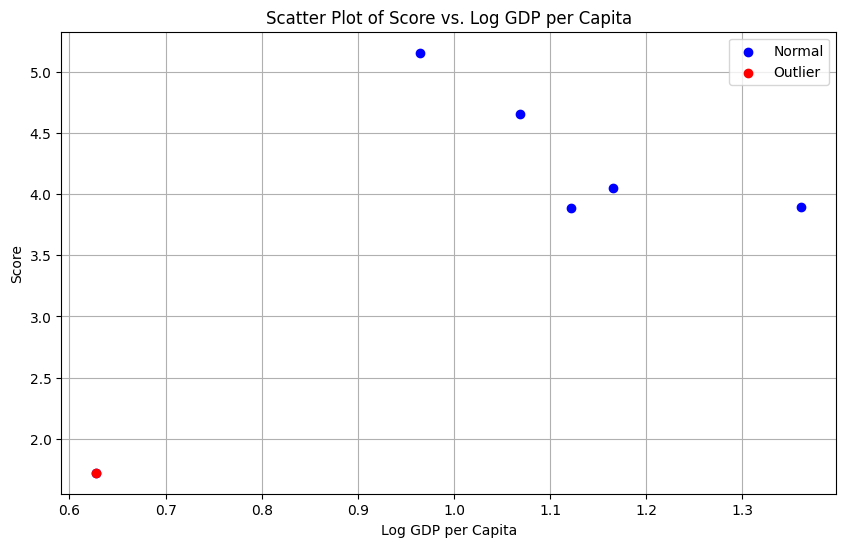

Outlier Countries:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

south_asia_df = pd.read_csv('World Happiness Report.csv')

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
filtered_df = south_asia_df[south_asia_df['Country name'].isin(south_asian_countries)]

def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

score_outliers = identify_outliers(filtered_df, 'score')
gdp_outliers = identify_outliers(filtered_df, 'Log GDP per capita')

outlier_countries = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Log GDP per capita'], filtered_df['score'], color='blue', label='Normal')
plt.scatter(outlier_countries['Log GDP per capita'], outlier_countries['score'], color='red', label='Outlier')
plt.title('Scatter Plot of Score vs. Log GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

print("Outlier Countries:")
print(outlier_countries[['Country name', 'score', 'Log GDP per capita']])


Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Correlation between Freedom to Make Life Choices and Score: 0.80
Correlation between Generosity and Score: 0.87


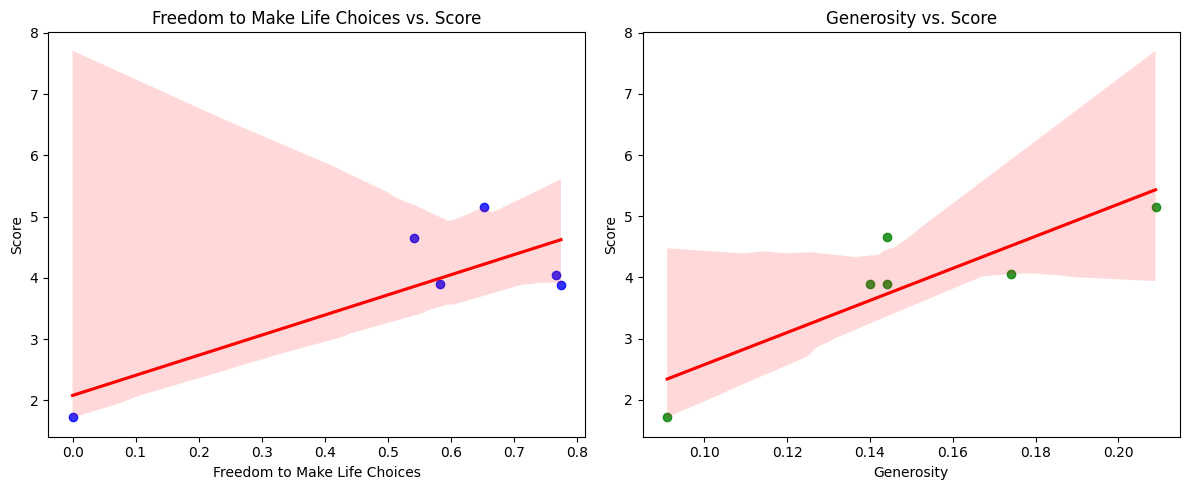

Discussion:
The strongest relationship is between Generosity and Score.
Higher freedom to make life choices is associated with higher scores.
Higher generosity is associated with higher scores.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

south_asia_df = pd.read_csv('World Happiness Report.csv')

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
filtered_df = south_asia_df[south_asia_df['Country name'].isin(south_asian_countries)]

correlation_freedom = filtered_df['Freedom to make life choices'].corr(filtered_df['score'])
correlation_generosity = filtered_df['Generosity'].corr(filtered_df['score'])

print(f"Correlation between Freedom to Make Life Choices and Score: {correlation_freedom:.2f}")
print(f"Correlation between Generosity and Score: {correlation_generosity:.2f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=filtered_df,
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs. Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=filtered_df,
            scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Generosity vs. Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

print("Discussion:")
if abs(correlation_freedom) > abs(correlation_generosity):
    print("The strongest relationship is between Freedom to Make Life Choices and Score.")
else:
    print("The strongest relationship is between Generosity and Score.")

if correlation_freedom > 0:
    print("Higher freedom to make life choices is associated with higher scores.")
else:
    print("Higher freedom to make life choices is associated with lower scores.")

if correlation_generosity > 0:
    print("Higher generosity is associated with higher scores.")
else:
    print("Higher generosity is associated with lower scores.")


Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

<ipython-input-16-da584dfbe8c3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['GDP-Score Gap'] = filtered_df['Log GDP per capita'] - filtered_df['score']


Countries ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

Countries ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


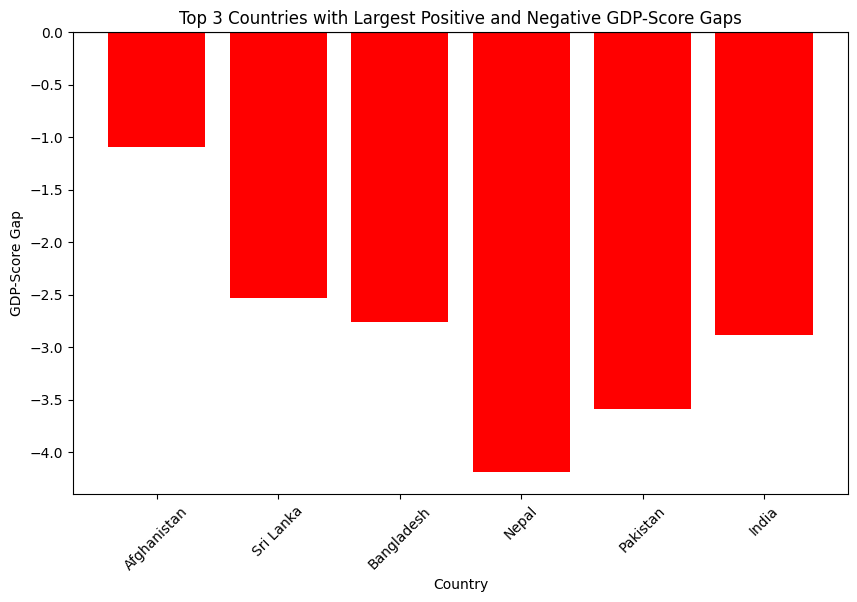


Analysis of Gaps:
Afghanistan has a negative gap, suggesting that its happiness score exceeds expectations based on its GDP per Capita. This may indicate strong social support systems or cultural factors contributing positively to life satisfaction despite lower economic output.
Sri Lanka has a negative gap, suggesting that its happiness score exceeds expectations based on its GDP per Capita. This may indicate strong social support systems or cultural factors contributing positively to life satisfaction despite lower economic output.
Bangladesh has a negative gap, suggesting that its happiness score exceeds expectations based on its GDP per Capita. This may indicate strong social support systems or cultural factors contributing positively to life satisfaction despite lower economic output.
Nepal has a negative gap, suggesting that its happiness score exceeds expectations based on its GDP per Capita. This may indicate strong social support systems or cultural factors contributing posit

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

south_asia_df = pd.read_csv('World Happiness Report.csv')

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
filtered_df = south_asia_df[south_asia_df['Country name'].isin(south_asian_countries)]


filtered_df['GDP-Score Gap'] = filtered_df['Log GDP per capita'] - filtered_df['score']

ascending_gap = filtered_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = filtered_df.sort_values(by='GDP-Score Gap', ascending=False)

print("Countries ranked by GDP-Score Gap (Ascending):")
print(ascending_gap[['Country name', 'GDP-Score Gap']])

print("\nCountries ranked by GDP-Score Gap (Descending):")
print(descending_gap[['Country name', 'GDP-Score Gap']])

top_positive_gaps = descending_gap.head(3)
top_negative_gaps = ascending_gap.head(3)

gaps_to_plot = pd.concat([top_positive_gaps, top_negative_gaps])

plt.figure(figsize=(10, 6))
plt.bar(gaps_to_plot['Country name'], gaps_to_plot['GDP-Score Gap'], color=['green' if x > 0 else 'red' for x in gaps_to_plot['GDP-Score Gap']])
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45)
plt.show()

print("\nAnalysis of Gaps:")
for index, row in gaps_to_plot.iterrows():
    if row['GDP-Score Gap'] > 0:
        print(f"{row['Country name']} has a positive gap, indicating that its GDP per Capita is significantly higher than its happiness score. This could be due to factors such as income inequality, lack of social support, or political instability affecting overall well-being.")
    else:
        print(f"{row['Country name']} has a negative gap, suggesting that its happiness score exceeds expectations based on its GDP per Capita. This may indicate strong social support systems or cultural factors contributing positively to life satisfaction despite lower economic output.")


3.3 Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

Complete the following task:
1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?
2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.
3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?
4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?
5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.
6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.
7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

South Asia - Mean Score: 3.90, Std Dev: 1.18
Middle East - Mean Score: 5.41, Std Dev: 1.57
Middle East has higher happiness scores on average.


<ipython-input-17-531296119796>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_south_asia, bottom_south_asia]), palette='viridis')
<ipython-input-17-531296119796>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_middle_east, bottom_middle_east]), palette='viridis')


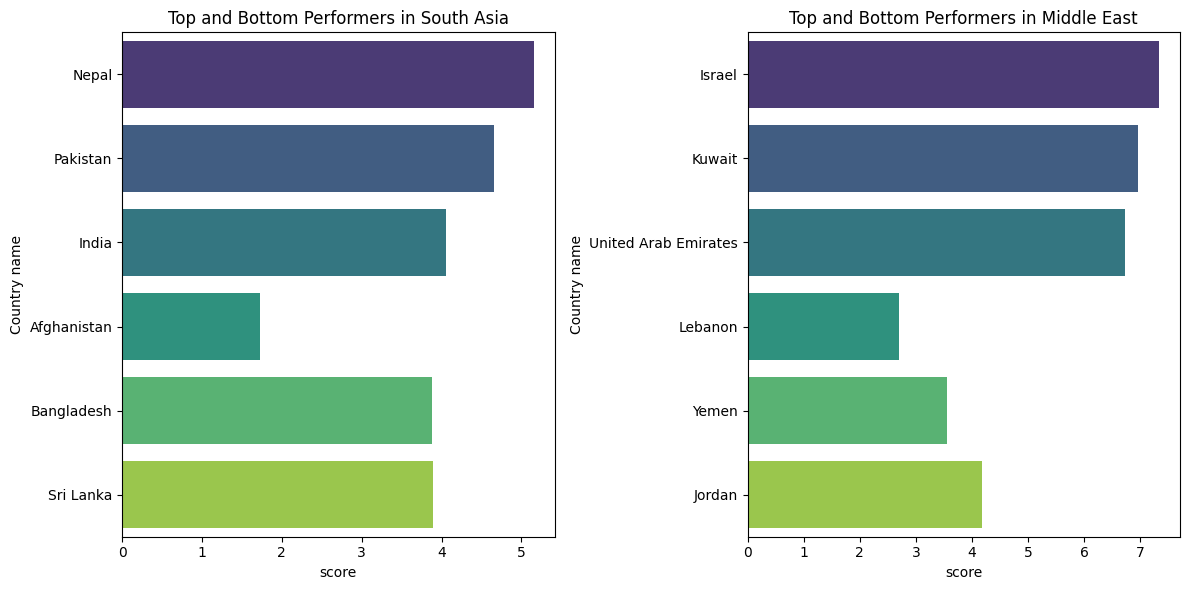

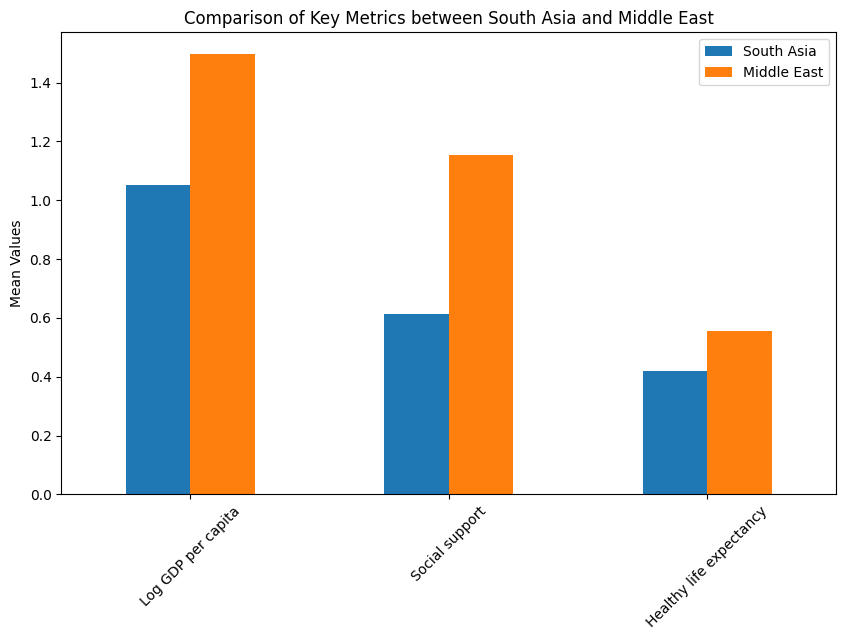

The metric showing the largest disparity is: Social support
South Asia - Range: 3.44, CV: 0.30
Middle East - Range: 4.63, CV: 0.29
South Asia has greater variability in happiness.
South Asia - Freedom Correlation: 0.80, Generosity Correlation: 0.87
Middle East - Freedom Correlation: 0.86, Generosity Correlation: 0.63


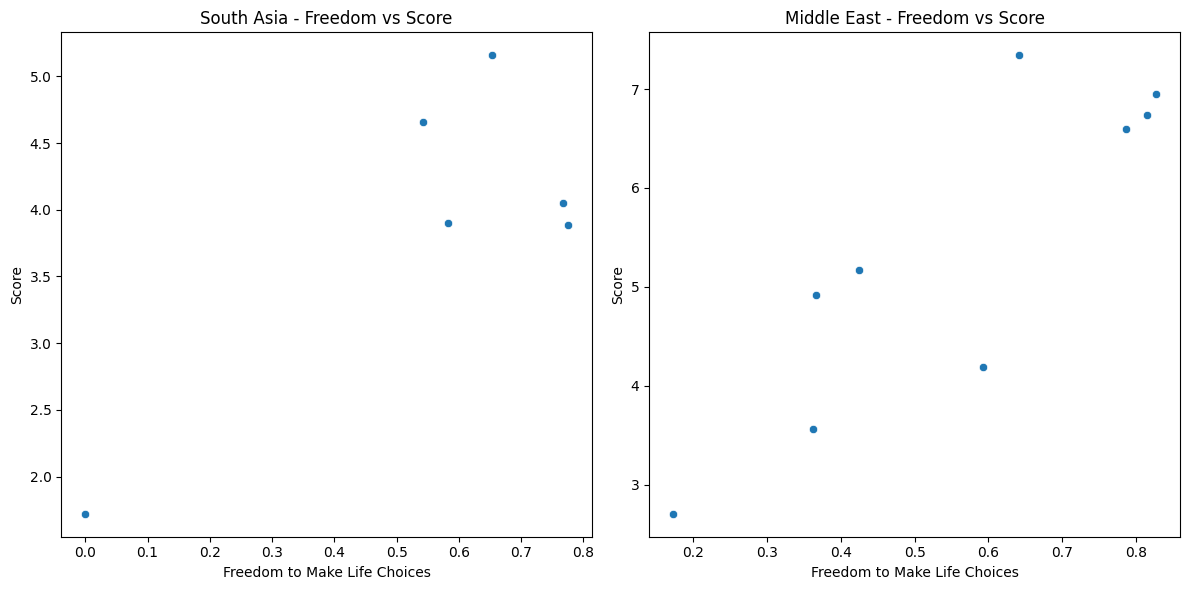

Outliers in South Asia:
    Country name  score
142  Afghanistan  1.721

Outliers in Middle East:
Empty DataFrame
Columns: [Country name, score]
Index: []


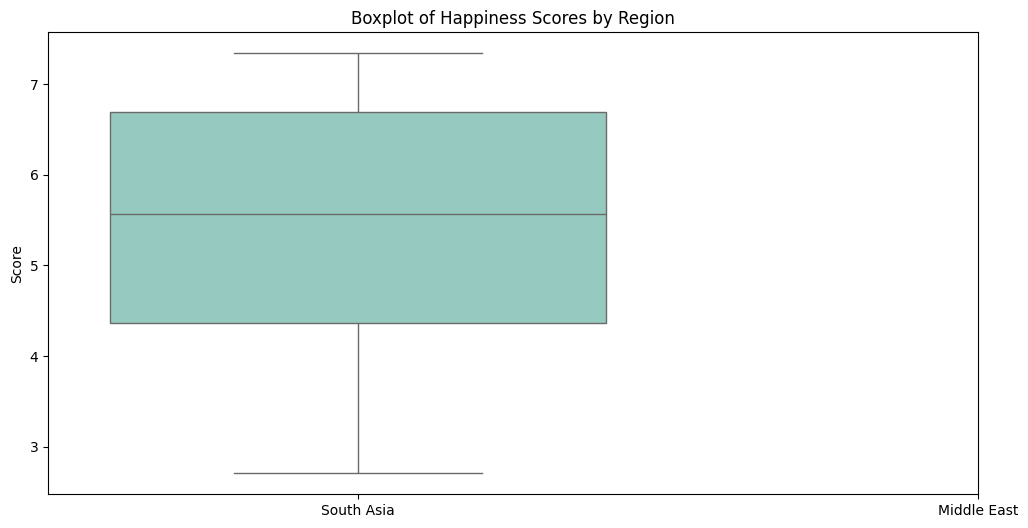

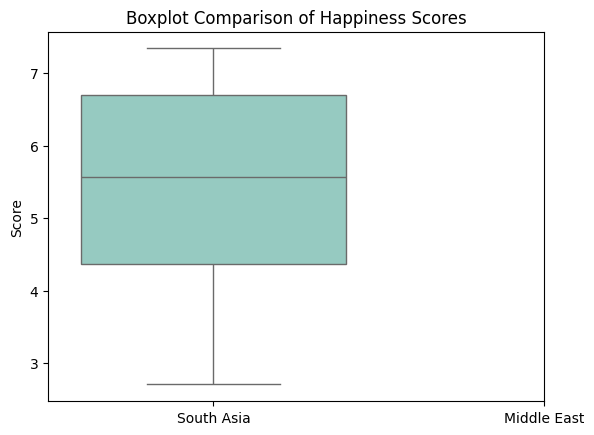

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('World Happiness Report.csv')

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine",
                         "Qatar", "Saudi Arabia", "Syria",
                         "United Arab Emirates", "Yemen"]

south_asia_df = data[data['Country name'].isin(south_asian_countries)]
middle_east_df = data[data['Country name'].isin(middle_east_countries)]

mean_south_asia = south_asia_df['score'].mean()
std_south_asia = south_asia_df['score'].std()
mean_middle_east = middle_east_df['score'].mean()
std_middle_east = middle_east_df['score'].std()

print(f"South Asia - Mean Score: {mean_south_asia:.2f}, Std Dev: {std_south_asia:.2f}")
print(f"Middle East - Mean Score: {mean_middle_east:.2f}, Std Dev: {std_middle_east:.2f}")

higher_region = 'South Asia' if mean_south_asia > mean_middle_east else 'Middle East'
print(f"{higher_region} has higher happiness scores on average.")

top_south_asia = south_asia_df.nlargest(3, 'score')
bottom_south_asia = south_asia_df.nsmallest(3, 'score')
top_middle_east = middle_east_df.nlargest(3, 'score')
bottom_middle_east = middle_east_df.nsmallest(3, 'score')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=pd.concat([top_south_asia, bottom_south_asia]), palette='viridis')
plt.title('Top and Bottom Performers in South Asia')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=pd.concat([top_middle_east, bottom_middle_east]), palette='viridis')
plt.title('Top and Bottom Performers in Middle East')

plt.tight_layout()
plt.show()

metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_metrics = south_asia_df[metrics].mean()
middle_east_metrics = middle_east_df[metrics].mean()

comparison_df = pd.DataFrame({'South Asia': south_asia_metrics, 'Middle East': middle_east_metrics})

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.show()

disparity = comparison_df['Middle East'] - comparison_df['South Asia']
largest_disparity_metric = disparity.idxmax()
print(f"The metric showing the largest disparity is: {largest_disparity_metric}")

range_south_asia = south_asia_df['score'].max() - south_asia_df['score'].min()
range_middle_east = middle_east_df['score'].max() - middle_east_df['score'].min()

cv_south_asia = std_south_asia / mean_south_asia
cv_middle_east = std_middle_east / mean_middle_east

print(f"South Asia - Range: {range_south_asia:.2f}, CV: {cv_south_asia:.2f}")
print(f"Middle East - Range: {range_middle_east:.2f}, CV: {cv_middle_east:.2f}")

more_variable_region = 'South Asia' if cv_south_asia > cv_middle_east else 'Middle East'
print(f"{more_variable_region} has greater variability in happiness.")

freedom_corr_sa = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
generosity_corr_sa = south_asia_df['Generosity'].corr(south_asia_df['score'])

freedom_corr_me = middle_east_df['Freedom to make life choices'].corr(middle_east_df['score'])
generosity_corr_me = middle_east_df['Generosity'].corr(middle_east_df['score'])

print(f"South Asia - Freedom Correlation: {freedom_corr_sa:.2f}, Generosity Correlation: {generosity_corr_sa:.2f}")
print(f"Middle East - Freedom Correlation: {freedom_corr_me:.2f}, Generosity Correlation: {generosity_corr_me:.2f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia_df)
plt.title('South Asia - Freedom vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_df)
plt.title('Middle East - Freedom vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

def identify_outliers(df):
    Q1 = df['score'].quantile(0.25)
    Q3 = df['score'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['score'] < lower_bound) | (df['score'] > upper_bound)]

south_asian_outliers = identify_outliers(south_asia_df)
middle_eastern_outliers = identify_outliers(middle_east_df)

print("Outliers in South Asia:")
print(south_asian_outliers[['Country name', 'score']])

print("\nOutliers in Middle East:")
print(middle_eastern_outliers[['Country name', 'score']])

plt.figure(figsize=(12, 6))
sns.boxplot(data=[south_asia_df['score'], middle_east_df['score']], palette="Set3")
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title('Boxplot of Happiness Scores by Region')
plt.ylabel('Score')
plt.show()


sns.boxplot(data=[south_asia_df['score'], middle_east_df['score']], palette="Set3")
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title('Boxplot Comparison of Happiness Scores')
plt.ylabel('Score')
plt.show()
